The original File EdStatsData.csv has the data in many differnt groups, such as regions like Arab World, East Asia and Pacific etc, 
income groups like low income, high income etc and according to countries as well.
After careful analysis of the data we realize that its is better to use the group based data and drop the country specific data.
This is because the group based data gives us the relevant correlations between wealth and education while freeing us from the 
country data which hard to manage and vizualize as there are 216 countries and areas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
while True:
    try:
        choice = int(input("Do you want to read from primary.csv or the original file EdStatsData.csv . (Please enter 1 for primary.csv and 2 for EdStatsData.csv) ? \n"))  #Taking the user'c choice
        assert choice == 1 or choice == 2 and isinstance(choice,int)
        break
    except:
        print("Please input a number between 1 or 2")
            

Do you want to read from primary.csv or the original file EdStatsData.csv . (Please enter 1 for primary.csv and 2 for EdStatsData.csv) ? 

Please input a number between 1 or 2
Do you want to read from primary.csv or the original file EdStatsData.csv . (Please enter 1 for primary.csv and 2 for EdStatsData.csv) ? 
2


In [11]:
if choice == 1:
    new_df = pd.read_csv('primary.csv')

elif choice == 2:
    #reading the original file
    df = pd.read_csv("EdStatsData.csv") 

   # Now we extract the non-country specific, only region and group based data

    new_df = df.loc[:91624]
    new_df.to_csv('primary.csv')

    print("Number of rows deleted : ", len(df["Indicator Name"]) - len(new_df["Indicator Name"]))

    print("Ratio of original data deleted : ",(len(df["Indicator Name"]) - len(new_df["Indicator Name"]))/len(df["Indicator Name"]))

Number of rows deleted :  795305
Ratio of original data deleted :  0.8966942148760331


If you read the EdStatsData.csv file,we see above, we reduce the file size by nearly 89.7% while still keeping the relevant data

We then extract the distinct group names available

In [27]:
new_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for i,name in zip(range(1,25),list(set(new_df["Country Name"]))):
    print(i," ",name)

1   Arab World
2   Euro area
3   Low income
4   North America
5   Least developed countries: UN classification
6   Low & middle income
7   Sub-Saharan Africa
8   Upper middle income
9   East Asia & Pacific
10   Europe & Central Asia
11   Latin America & Caribbean
12   High income
13   Europe & Central Asia (excluding high income)
14   World
15   Middle East & North Africa
16   Sub-Saharan Africa (excluding high income)
17   Middle East & North Africa (excluding high income)
18   Lower middle income
19   OECD members
20   Heavily indebted poor countries (HIPC)
21   East Asia & Pacific (excluding high income)
22   South Asia
23   European Union
24   Latin America & Caribbean (excluding high income)


These 24 groups give give us important categories to work off of to see correlations between education and wealth.

In [13]:
current_name = 'Arab World'
start = 0
end = 0
regions_dict = {}
for name in new_df['Country Name']:
    if name == current_name:
        end += 1
    else:
        regions_dict[current_name] = (start,end)
        start = end
        end = start+1
        current_name = name

In [14]:
regions_dict

{'Arab World': (0, 3665),
 'East Asia & Pacific': (3665, 7330),
 'East Asia & Pacific (excluding high income)': (7330, 10995),
 'Euro area': (10995, 14660),
 'Europe & Central Asia': (14660, 18325),
 'Europe & Central Asia (excluding high income)': (18325, 21990),
 'European Union': (21990, 25655),
 'Heavily indebted poor countries (HIPC)': (25655, 29320),
 'High income': (29320, 32985),
 'Latin America & Caribbean': (32985, 36650),
 'Latin America & Caribbean (excluding high income)': (36650, 40315),
 'Least developed countries: UN classification': (40315, 43980),
 'Low & middle income': (43980, 47645),
 'Low income': (47645, 51310),
 'Lower middle income': (51310, 54975),
 'Middle East & North Africa': (54975, 58640),
 'Middle East & North Africa (excluding high income)': (58640, 62305),
 'Middle income': (62305, 65970),
 'North America': (65970, 69635),
 'OECD members': (69635, 73300),
 'South Asia': (73300, 76965),
 'Sub-Saharan Africa': (76965, 80630),
 'Sub-Saharan Africa (exclud

We have stored their starting and ending row indices as tuples in a dictionary so we can easily access their data from the dataframe.

In [15]:
regions_dict["Low income"][0]

47645

In [16]:
new_df["Country Name"][3664:3668]

3664             Arab World
3665    East Asia & Pacific
3666    East Asia & Pacific
3667    East Asia & Pacific
Name: Country Name, dtype: object

As we see above, 'East Asia & Pacific' starts at 3665 as reflected in the regions_dict dictionary

We went through all the different indicators and picked the ones that we though would have good colleration and 
had values present in the data 

In [17]:
Indicator_dict = {'Adjusted net enrollment rate, primary, both sexes(%)':4,
                 'Adjusted net enrollment rate, primary, gender parity index':5,
                 'Adult literacy rate, population 15+ years, both sexes (%)' : 20,
                 'Cumulative Drop-out rate to last grade of primary education (%)' : 520,
                 'Primary to Lower Secondary Transition Rate, both sexes (%)' : 706,
                 'GDP per capita (constant 2005 US$)' : 1244,
                 'GDP per capita (current US$)' : 1245,
                 'GDP per capita, PPP' : 1246,
                 'Lower secondary completion rate, both sexes (%)' : 1518,
                 'Population, total' : 2533, 
                 'Pupil teacher ratio, primary education ' : 2551,
                 'Unemployment %' : 3348,
                 'Youth literacy rate, 15-24 years,both sexes (%)' : 3661}
Indicator_dict_keys = list(Indicator_dict.keys())
Indicator_dict_values = list(Indicator_dict.values())

Indicator_dict stores the number of rows we need to add to the start of a new region to get that particular indicator

In [18]:
def plotting():
    '''
    This function is called repeatedly to plot bar graphs between the income based country groups and different indicators.
    The income based country groups are 'Low income','Lower middle income','Low & middle income',
    'Middle income','Upper middle income'and 'High income'
    '''
    while True:
        try:
            for i,k in zip(range(13),Indicator_dict.keys()):
                print(i,k)
    #         print(k for k in Indicator_dict.keys())
            choice = int(input("Input your choice between [0,12] ? \n"))  #Taking the user'c choice
            assert choice >= 0 and choice <= 12 and isinstance(choice,int)
            break
        except:
            print("Please input a number between [0,11]")
            
    j = choice
    i = Indicator_dict_values[j]
    l = []
    l.append(new_df.loc[regions_dict['Low income'][0]+i][44])
    l.append(new_df.loc[regions_dict['Low & middle income'][0]+i][44])
    l.append(new_df.loc[regions_dict['Lower middle income'][0]+i][44])
    l.append(new_df.loc[regions_dict['Middle income'][0]+i][44])
    l.append(new_df.loc[regions_dict['Upper middle income'][0]+i][44])
    l.append(new_df.loc[regions_dict['High income'][0]+i][44])

    print("Indicator Name " , Indicator_dict_keys[j])

    D = {}
    for i,income_level in zip(range(7),['Low income','Lower middle income','Low & middle income','Middle income','Upper middle income','High income']):
        D[income_level] = l[i]

    D_keys = list(D.keys())
    D_keys[1],D_keys[2] = D_keys[2], D_keys[1]

    D_vals = list(D.values())
    D_vals[1],D_vals[2] = D_vals[2], D_vals[1]

    import matplotlib.pyplot as plt
    plt.figure(figsize=(13,10))
    plt.bar(range(len(D)), D_vals, align='center')
    plt.xticks(range(len(D)), D_keys)

    plt.xlabel('Income Levels',fontsize = 17)
    plt.ylabel(Indicator_dict_keys[j],fontsize = 17)
    plt.title('Income Levels vs ' + Indicator_dict_keys[j] ,fontsize = 19)

    plt.show()
    return Indicator_dict_values

0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
0
Indicator Name  Adjusted net enrollment rate, primary, both sexes(%)


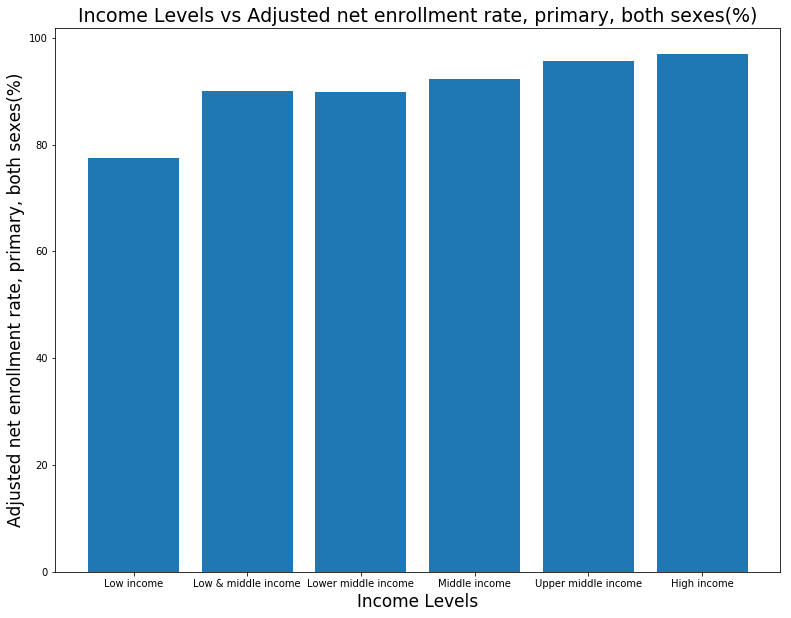

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
1
Indicator Name  Adjusted net enrollment rate, primary, gender parity index


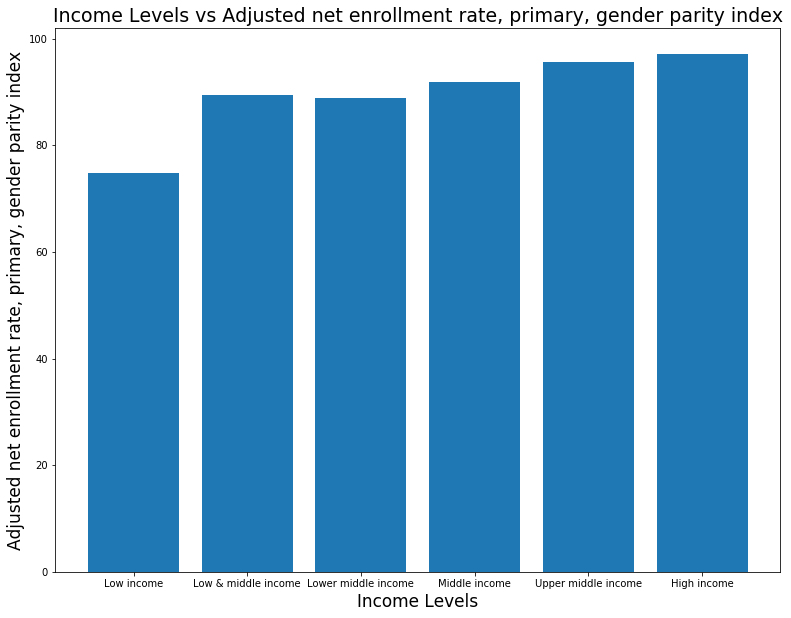

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
2
Indicator Name  Adult literacy rate, population 15+ years, both sexes (%)


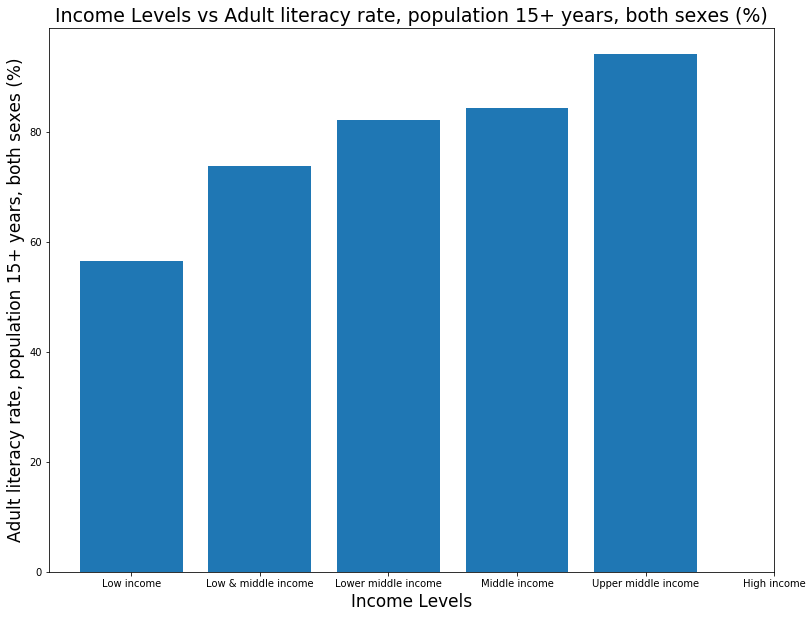

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
3
Indicator Name  Cumulative Drop-out rate to last grade of primary education (%)


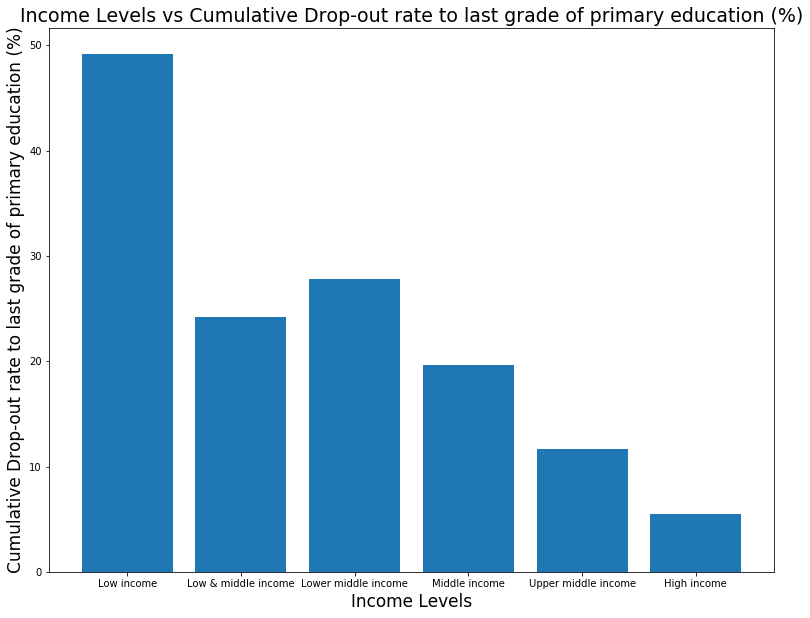

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
4
Indicator Name  Primary to Lower Secondary Transition Rate, both sexes (%)


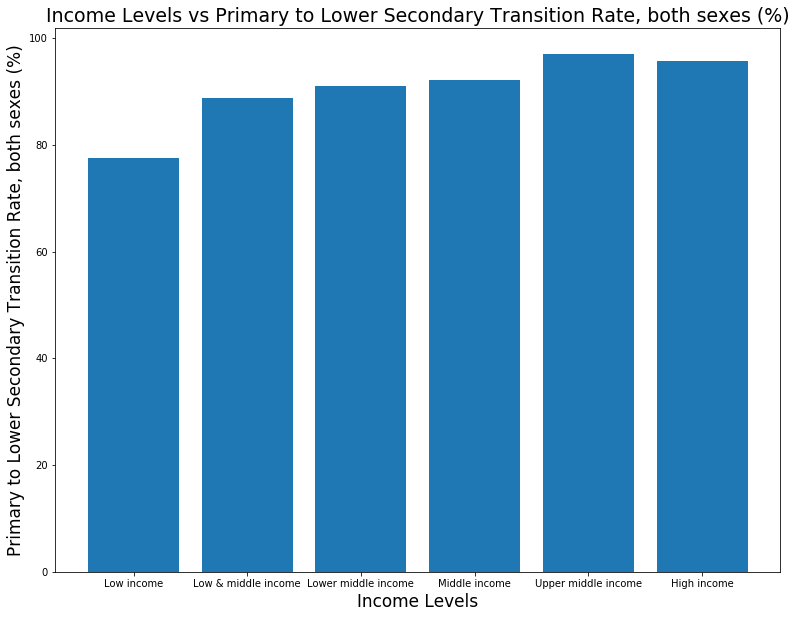

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
5
Indicator Name  GDP per capita (constant 2005 US$)


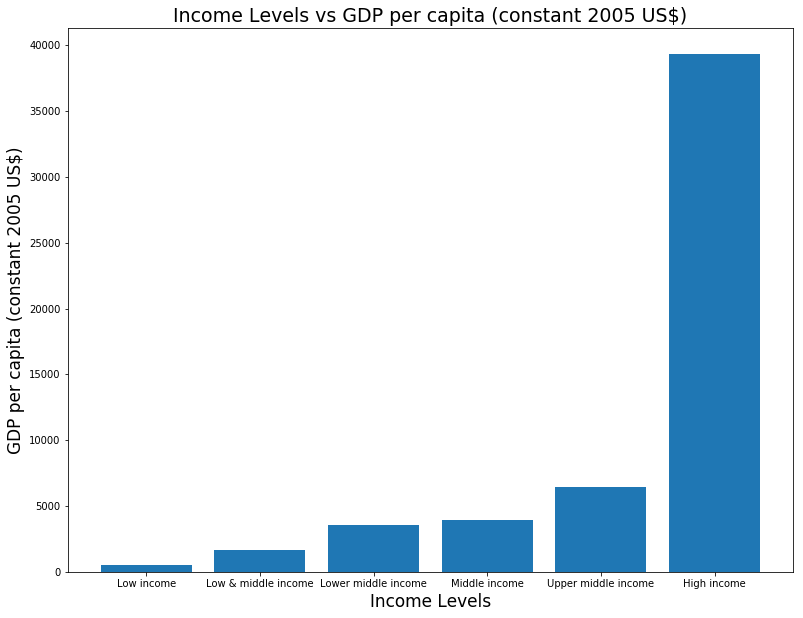

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
6
Indicator Name  GDP per capita (current US$)


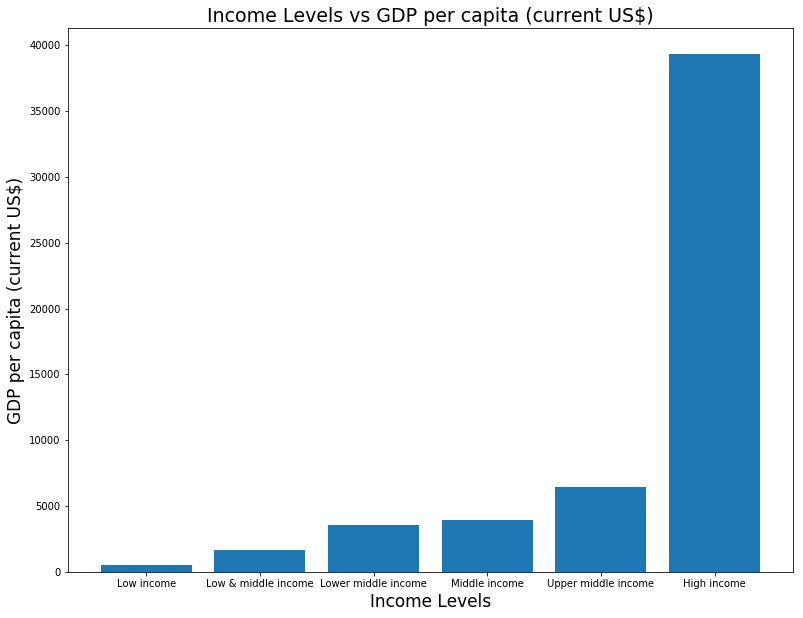

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
7
Indicator Name  GDP per capita, PPP


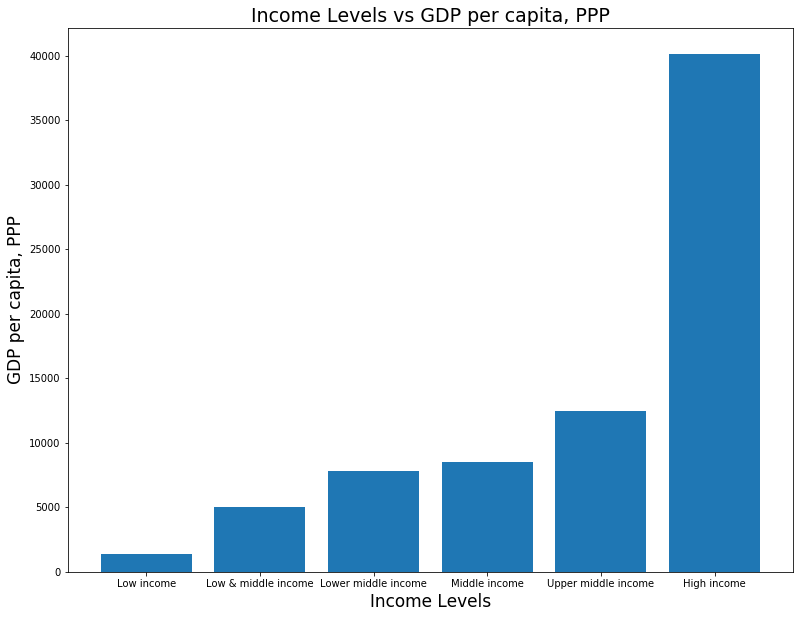

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
8
Indicator Name  Lower secondary completion rate, both sexes (%)


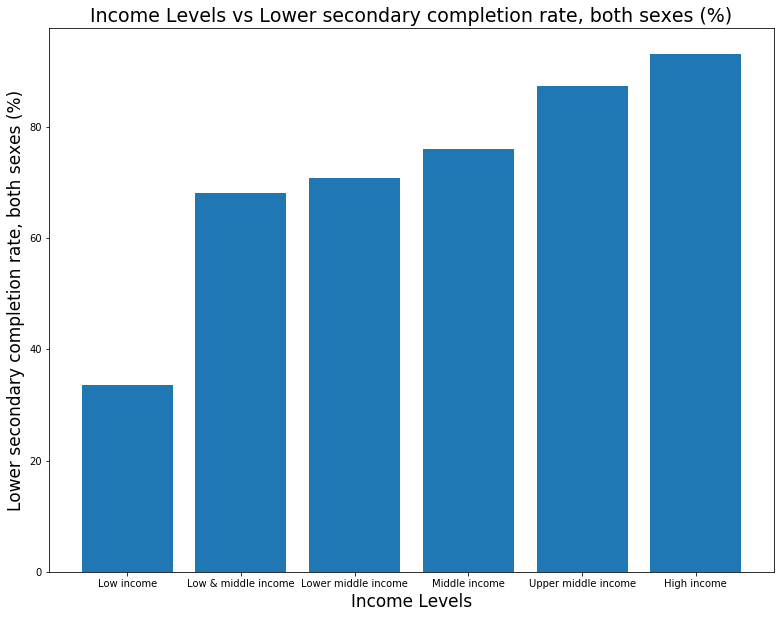

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
9
Indicator Name  Population, total


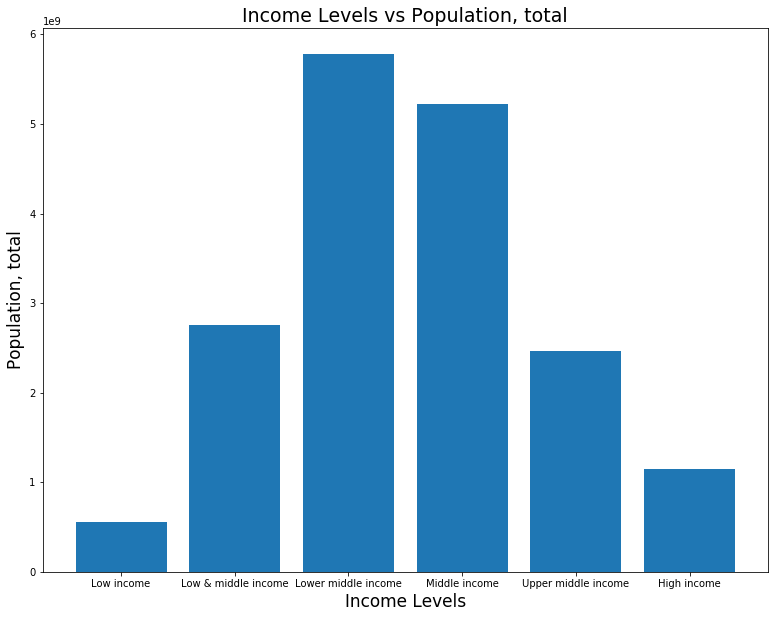

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
10
Indicator Name  Pupil teacher ratio, primary education 


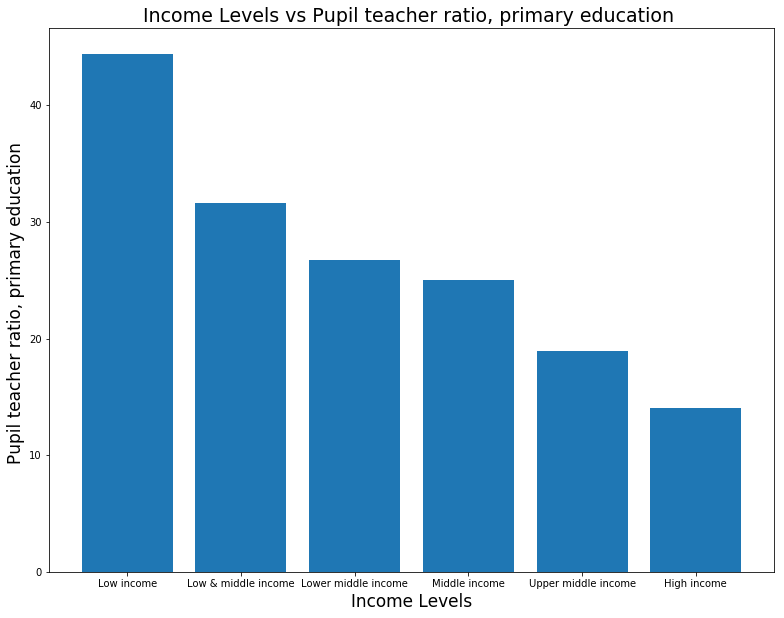

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
11
Indicator Name  Unemployment %


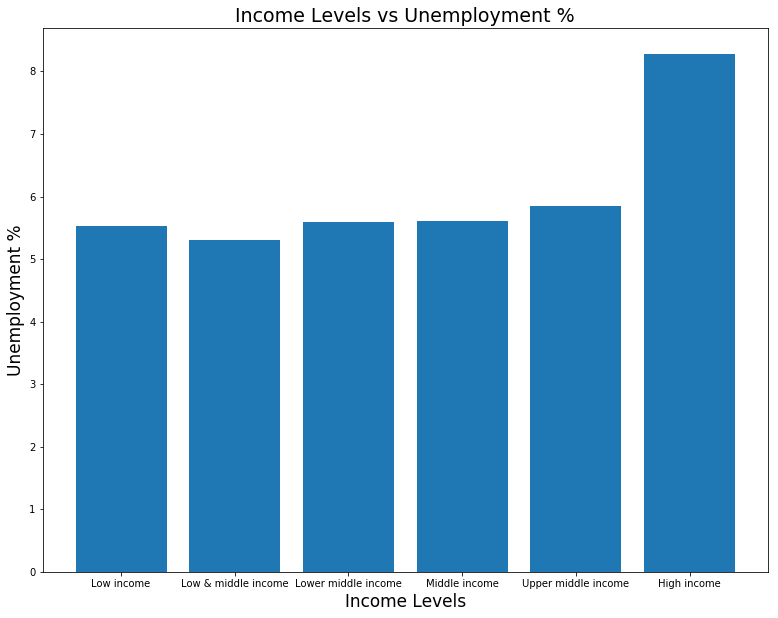

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice between [0,12] ? 
12
Indicator Name  Youth literacy rate, 15-24 years,both sexes (%)


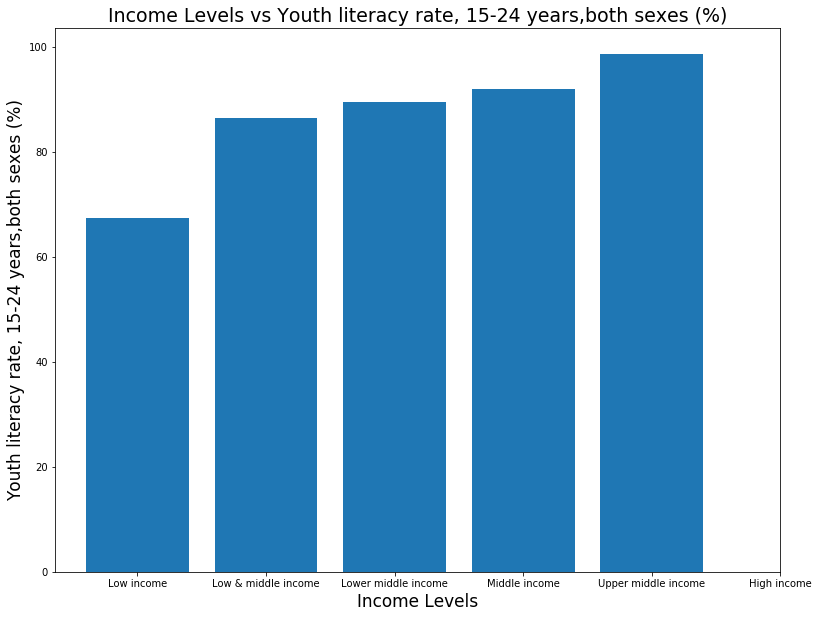

Do you want to plot another Indicator ? 
1.Yes
2.No
2
2


In [19]:
plotting()
while True:
    # This loop is used to keep plotting until the user is satisfied
    try:
        choice = int(input("Do you want to plot another Indicator ? \n1.Yes\n2.No\n"))
        assert choice == 1  or choice == 2 
    except:
        print("Please input a number between 1 and 12")
    print(choice)
    if choice == 1:
        print('OK')
        plotting()
    else:
        break
    

In [20]:
def plotting2():  
    '''
    This function is called repeatedly to plot graphs between indicators that the user chooses.
    Both the x and y axis are chosen by the user
    '''
    while True:
            try:
                for i,k in zip(range(13),Indicator_dict.keys()):
                    print(i,k)
        #         print(k for k in Indicator_dict.keys())
                x_axis = int(input("Input your choice for x axis between [0,11] ? \n"))
                assert x_axis >= 0 and x_axis < 13 and isinstance(x_axis,int)
                break
            except:
                print("Please input a number between [0,11]")

    while True:
            try:
                for i,k in zip(range(12),Indicator_dict.keys()):
                    print(i,k)
        #         print(k for k in Indicator_dict.keys())
                y_axis = int(input("Input your choice for y axis between [0,11] ? \n"))
                assert y_axis > 0 and y_axis < 12 and isinstance(y_axis,int)
                break
            except:
                print("Please input a number between [0,11]")

    l1 = []
    l2 = []

    for income_level in ['Low income','Lower middle income','Low & middle income','Middle income','Upper middle income','High income']:
        for i in range(len(new_df.loc[regions_dict[income_level][0]+Indicator_dict_values[x_axis]][24:49])):
            l1.append(new_df.loc[regions_dict[income_level][0]+Indicator_dict_values[x_axis]][24:49][i])
        for i in range(len(new_df.loc[regions_dict[income_level][0]+Indicator_dict_values[y_axis]][24:49])):
            l2.append(new_df.loc[regions_dict[income_level][0]+Indicator_dict_values[y_axis]][24:49][i])
        
    plt.figure(figsize  = (7,7))
    plt.plot(l1,l2,'ro')

    plt.xlabel(Indicator_dict_keys[x_axis],fontsize = 12)
    plt.ylabel(Indicator_dict_keys[y_axis],fontsize = 12)
    plt.title(Indicator_dict_keys[x_axis]+' vs '+ Indicator_dict_keys[y_axis])
    plt.savefig(Indicator_dict_keys[x_axis]+'vs'+ Indicator_dict_keys[y_axis] +'.png')
    plt.show()

0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
1
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP

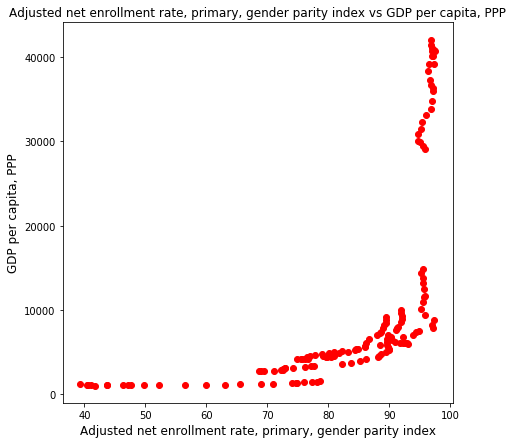

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
0
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capi

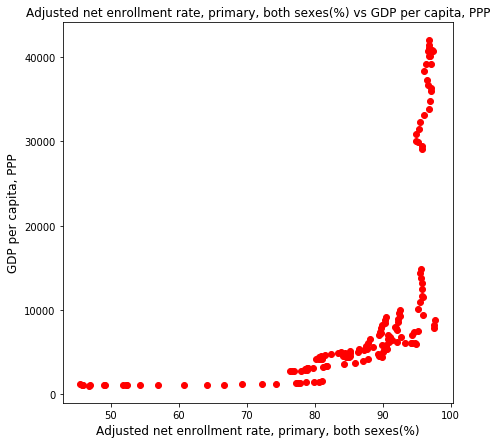

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
2
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capi

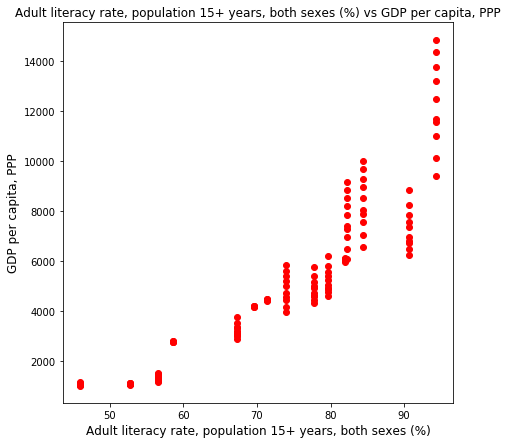

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
3
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capi

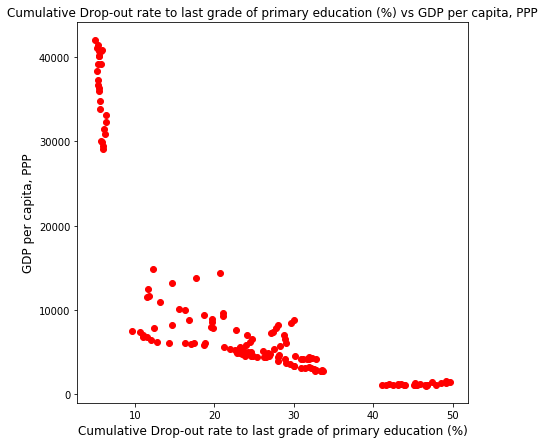

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
8
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capi

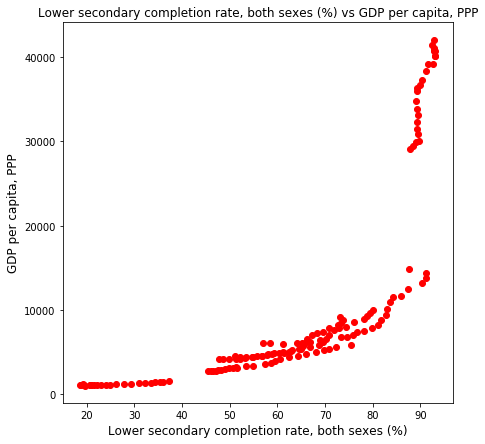

Do you want to plot another Indicator ? 
1.Yes
2.No
1
1
OK
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per capita (constant 2005 US$)
6 GDP per capita (current US$)
7 GDP per capita, PPP
8 Lower secondary completion rate, both sexes (%)
9 Population, total
10 Pupil teacher ratio, primary education 
11 Unemployment %
12 Youth literacy rate, 15-24 years,both sexes (%)
Input your choice for x axis between [0,11] ? 
10
0 Adjusted net enrollment rate, primary, both sexes(%)
1 Adjusted net enrollment rate, primary, gender parity index
2 Adult literacy rate, population 15+ years, both sexes (%)
3 Cumulative Drop-out rate to last grade of primary education (%)
4 Primary to Lower Secondary Transition Rate, both sexes (%)
5 GDP per cap

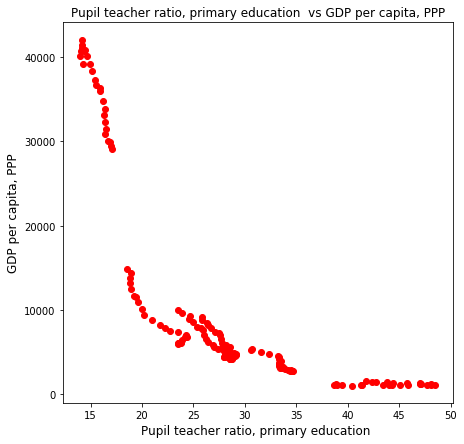

Do you want to plot another Indicator ? 
1.Yes
2.No
2
2


In [21]:
plotting2()
while True:
    # This loop is used to keep plotting until the user is satisfied
    try:
        choice = int(input("Do you want to plot another Indicator ? \n1.Yes\n2.No\n"))
        assert choice == 1  or choice == 2 
    except:
        print("Please input a number between 1 and 12")
    print(choice)
    if choice == 1:
        print('OK')
        plotting2()
    else:
        break

In [24]:
region_keys = list(regions_dict.keys())
compare_list = [region_keys[1],
                region_keys[2],
                region_keys[4],
                region_keys[5],
                region_keys[9],
                region_keys[10],
                region_keys[15],
                region_keys[16],
                region_keys[21],
                region_keys[22]]

In [25]:
compare_list

['East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)']

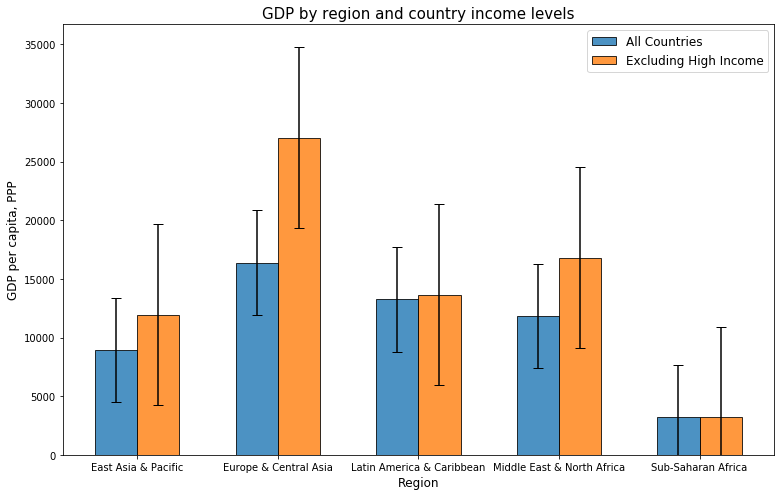

In [26]:
h_income = []
l_income = []
choice = 7
for i in range(len(compare_list)):
    if i%2 == 0:
        h_income.append(new_df.loc[regions_dict[compare_list[i]][0]+Indicator_dict_values[choice]][44])
    else:
        l_income.append(new_df.loc[regions_dict[compare_list[i]][0]+Indicator_dict_values[choice]][44])

# data to plot
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

fig, ax = plt.subplots(figsize = (11,7))
rects1 = plt.bar(index, l_income, bar_width,alpha = 0.8, edgecolor = 'black',capsize=5, 
                 label = 'All Countries', yerr = np.std(np.array(l_income)))
rects2 = plt.bar(index + bar_width, h_income, bar_width,alpha = 0.8, edgecolor='black',capsize=5, 
                 label='Excluding High Income', yerr = np.std(np.array(h_income)))

plt.xticks(index + bar_width*0.5, ('East Asia & Pacific',
                                   'Europe & Central Asia',
                                   'Latin America & Caribbean',
                                   'Middle East & North Africa',
                                   'Sub-Saharan Africa'))
plt.legend(loc = 'upper right',fontsize = 12)
plt.xlabel('Region',fontsize = 12)
plt.ylabel('GDP per capita, PPP',fontsize = 12)
plt.title('GDP by region and country income levels', fontsize = 15)
ax.set_ylim( ymin = 10 )
# plt.figure(figsize = (10,10))
plt.tight_layout()
plt.show()